# Decision Trees

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "/content/drive/MyDrive/Colab Notebooks/PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [5]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [6]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [7]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree:

In [8]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

In [ ]:
!pip install pydotplus

In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
pip install IPython

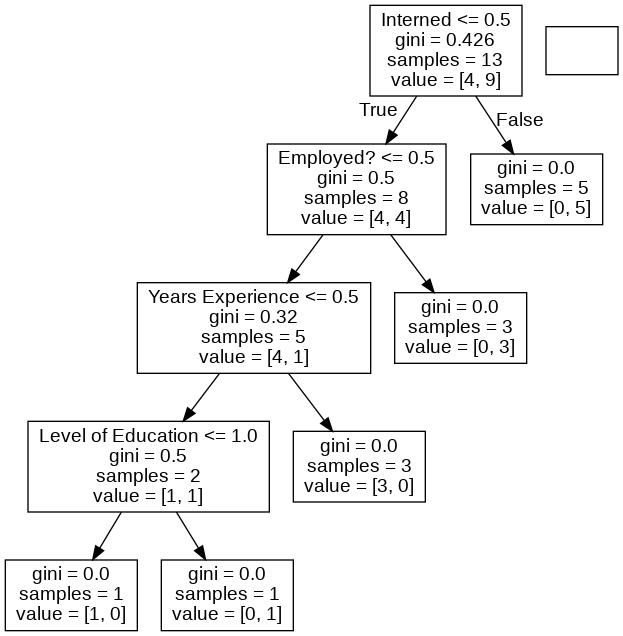

In [9]:
import graphviz
##from IPython.display import Image  
from six import StringIO  
import pydotplus

import pydotplus
from IPython.display import Image 
from six import StringIO  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

Image(graph.create_png())  

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Visualize A Decision tree using GraphViz and Pydotplus


Graphviz is an open-source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

export_graphviz - This function generates a GraphViz representation of the decision tree in dot format, which is then written into an output file ('out_file').

We'll be using the iris dataset to visualize the decision tree formation.

In [11]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
iris = datasets.load_iris()
clf = DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier()

In [12]:
from sklearn.tree import export_graphviz

In [13]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          filled=True)

In [14]:
import pydotplus
from IPython.display import Image 

In [15]:
graph = pydotplus.graph_from_dot_data(dot_data)

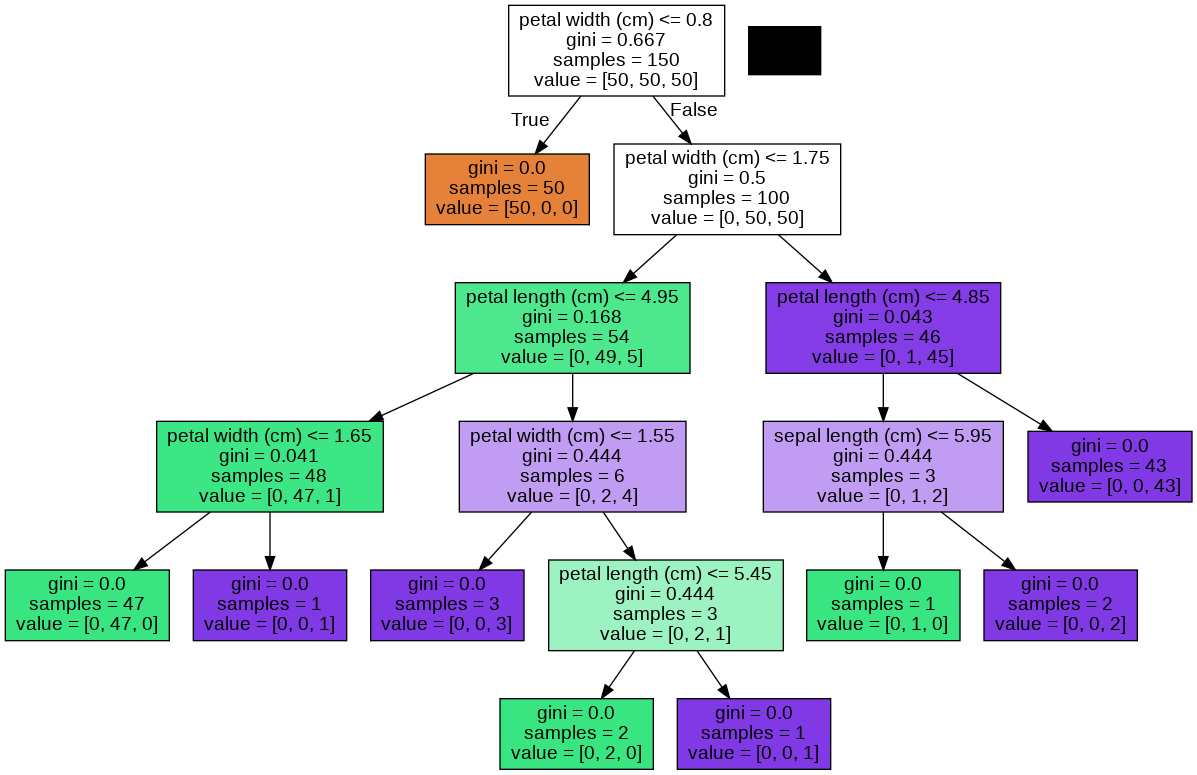

In [16]:
Image(graph.create_png())

out_file gives the name of the output file. If None, the result is returned as string

feature_names = Names of each of the features in the dataset. If None generic names like feature_0,feature_1,feature_2... will be used.

filled = it takes a boolean value. If True it paints the node to indicate the majority class for classification,extremity of values for regression, or purity of node for multi-output.

Pydotplus - PyDotPlus provides a Python Interface to Graphviz’s Dot language.